In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

Path = os.getcwd()

In [288]:
pi = 3.14

#NMR
Mag1 = [3083.22, 3098.22, 3108.22, 3158.22, 3183.22, 3208.22, 3233.22]    #Gauss
Freq1 = [13100, 13160, 13200, 13400, 13500, 13600, 13700]                  #kHz
Resonance1 = [-3.69, -2.91, -3.51, -4.29, -4.80, -5.04, -6.81]           #Gauss
xerr1 = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05] #khz
yerr1 = [0.41, 0.35, 0.2, 0.28, 0.31, 0.35, 0.4] #Gauss

#ESR
Mag2 = [18.27, 18.27, 18.27, 18.27, 18.27, 18.27, 18.27, 18.27, 18.27, 18.27, 18.27, 18.27, 18.27]   #Gauss
Freq2 = [49000, 49200, 49400, 49500, 49600, 49700, 49800, 50000, 50200, 50400, 50600, 50800, 51000] #kHz
Resonance2 = [-0.41, -0.34, -0.27, -0.23, -0.20, -0.16, -0.13, -0.06, 0.02, 0.09, 0.16, 0.23, 0.30] #Gauss
yerr2 = [0.002, 0.0024, 0.002, 0.003, 0.0025, 0.0042 ,0.004, 0.003, 0.0048, 0.003, 0.002, 0.001, 0.0026] #Gauss
xerr2 = [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005]

In [263]:
offset1, offset2 = [], []

#NMR--------------------------------------------------
for i in range(len(Mag1)):
    offset1.append(Mag1[i] + Resonance1[i])

slope1, intercept1 = np.polyfit(Freq1,offset1, 1)

#Finding the Best Fit Line
xrange1 = np.linspace(13050,13750,1000)
y1 = xrange*slope1 + intercept1

#Finding the Residuals
expected1 = []
residuals1 = []
for i in range(len(Mag1)):
    expected1.append(Freq1[i]* slope1 + intercept1)
    residuals1.append((expected1[i]-offset1[i])) 
    
#ESR--------------------------------------------------
for j in range(len(Mag2)):
    offset2.append(Mag2[j] + Resonance2[j])
    
slope2, intercept2 = np.polyfit(Freq2,offset2, 1)

#Finding the Best Fit Line
xrange2 = np.linspace(48950,51050,1000)
y2 = xrange2*slope2 + intercept2

#Finding the Residuals
expected2 = []
residuals2 = []
for j in range(len(Mag2)):
    expected2.append(Freq2[j]* slope2 + intercept2)
    residuals2.append((expected2[j]-offset2[j])) 

In [264]:
expected1

[3080.2020443349734,
 3094.8982389162543,
 3104.6957019704414,
 3153.6830172413775,
 3178.1766748768455,
 3202.6703325123135,
 3227.1639901477815]

In [265]:
np.sum(residuals2)

-7.105427357601002e-15

$\gamma = g\frac{Q}{2M}$

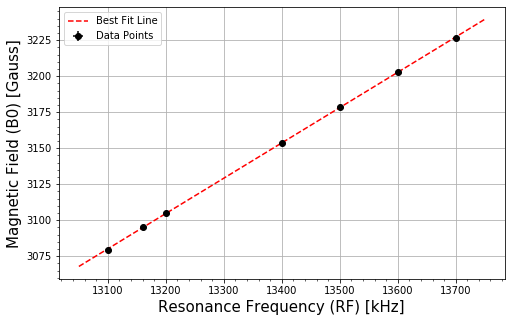

In [290]:
plt.figure(figsize = [8,5])
plt.errorbar(Freq1,offset1,xerr= xerr1, yerr=yerr1,fmt='o', color = 'black',label='Data Points')
plt.plot(xrange1,y1,'--',c='red',label='Best Fit Line')
plt.legend()
plt.grid()
#plt.title("NMR Experiment to find the Proton g-factor", size = 15)
plt.xlabel("Resonance Frequency (RF) [kHz]", size = 15)
plt.ylabel("Magnetic Field (B0) [Gauss]", size = 15)
plt.minorticks_on()
plt.savefig(Path + "/NMR data",bbox_inches='tight')
plt.show()

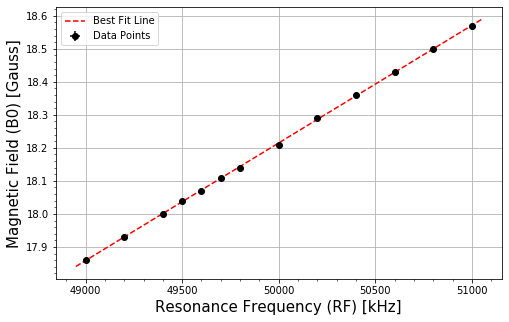

In [291]:
plt.figure(figsize = [8,5])
plt.errorbar(Freq2,offset2,xerr= xerr2,yerr=yerr2,fmt='o', color = 'black',label='Data Points')
plt.plot(xrange2,y2,'--',c='red',label='Best Fit Line')
plt.legend()
plt.grid()
#plt.title("ESR Experiment to find the Electron g-factor", size = 15)
plt.xlabel("Resonance Frequency (RF) [kHz]", size = 15)
plt.ylabel("Magnetic Field (B0) [Gauss]", size = 15)
plt.minorticks_on()
plt.savefig(Path + "/ESR data",bbox_inches='tight')
plt.show()

In [292]:
#Known G-Factor Values
known_gp = 5.585694713
known_ge = -2.00231930436256

#Proton info
mp = 1.6726219e-27   #kg
qp = 1.602176634e-19 #Coulombs

#Electron info
me = 9.1093837015e-31 #kg
qe = -1.602176634e-19 #Coulombs

#Finding the G-Factor
gp = (slope1 * 1000000000  * 2 * mp) / qp
ge = (slope2 * 100000000000000 * 2 * me) / qe

#Finding the offset to the known g-factor
gp_off = (gp - known_gp) / known_gp*100
ge_off = (ge - known_ge) / known_ge*100



print("Our measured Proton g-factor is: "+str(round(gp,9))+"(98)")
print("This measurement is off the actual Progon g-factor by "+str(round(gp_off,3))+"%")
print("Our measured Electron g-factor is: "+str(round(ge*2*pi,9))+"(79)")
print("This measurement is off the actual Electron g-factor by "+str(round(ge_off,3))+"%")

Our measured Proton g-factor is: 5.11412129(98)
This measurement is off the actual Progon g-factor by -8.443%
Our measured Electron g-factor is: -2.544606084(79)
This measurement is off the actual Electron g-factor by -79.764%


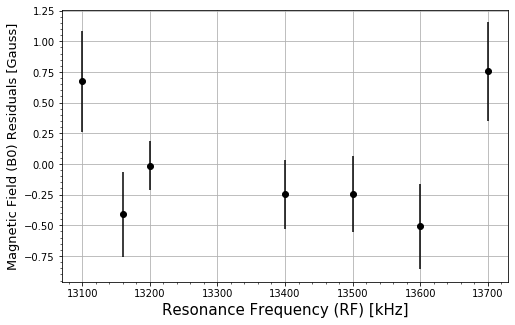

In [297]:
plt.figure(figsize = [8,5])
plt.errorbar(Freq1,residuals1,xerr=xerr1,yerr=yerr1,fmt ='o',color = 'black')
plt.grid()
#plt.title("NMR Experiment residuals to find the Proton g-factor", size = 15)
plt.xlabel("Resonance Frequency (RF) [kHz]", size = 15)
plt.ylabel("Magnetic Field (B0) Residuals [Gauss]", size = 13)
plt.minorticks_on()
plt.savefig(Path + "/NMR Residuals plot",bbox_inches='tight')
plt.show()

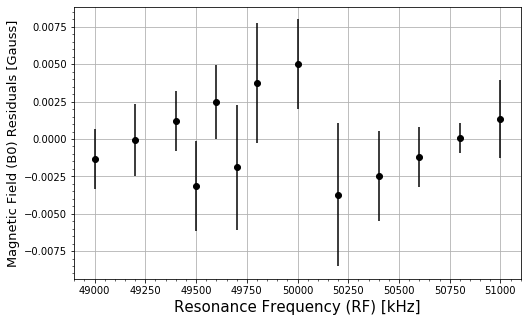

In [298]:
plt.figure(figsize = [8,5])
plt.errorbar(Freq2,residuals2,xerr=xerr2,yerr=yerr2,fmt ='o',color = 'black')
plt.grid()
#plt.title("ESR Experiment residuals to find the Electron g-factor", size = 15)
plt.xlabel("Resonance Frequency (RF) [kHz]", size = 15)
plt.ylabel("Magnetic Field (B0) Residuals [Gauss]", size = 13)
plt.minorticks_on()
plt.savefig(Path + "/ESR Residuals plot",bbox_inches='tight')
plt.show()

In [299]:
len(Freq2)

13

In [300]:
slope1

0.24493657635467989

In [305]:
slope2*1000

0.3563299442440176